In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Master_Thesis/tts-cgan-main"

/content/drive/MyDrive/Master_Thesis/tts-cgan-main


In [5]:
data_train = pd.read_pickle('./ecg_train_final.pkl')
data_test = pd.read_pickle('./ecg_train_final.pkl')

In [ ]:
data_train.head()

In [ ]:
data_train.isnull().sum().to_numpy()
data_test.isnull().sum().to_numpy()

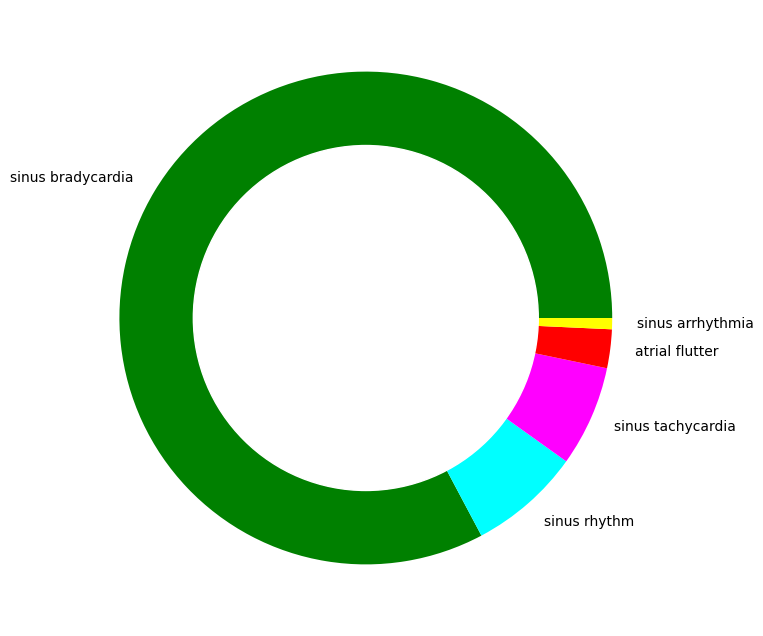

In [6]:
# viewing the distribution of beats in our dataset
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data_train['Label'].value_counts(), labels=['sinus bradycardia', 'sinus rhythm', 'sinus tachycardia',
                                                'atrial flutter', 'sinus arrhythmia'], colors=['green', 'cyan', 'magenta',
                                                                                   'red', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)


In [7]:
cls_dit = {'sinus bradycardia':0, 'sinus rhythm':1, 'sinus tachycardia':2,
                                                'atrial flutter':3, 'sinus arrhythmia':4}

In [8]:
# making the class labels for our dataset
data_0 = data_train[data_train["Label"] == 0]
data_1 = data_train[data_train["Label"] == 1]
data_2 = data_train[data_train["Label"] == 2]
data_3 = data_train[data_train["Label"] == 3]
data_4 = data_train[data_train["Label"] == 4]

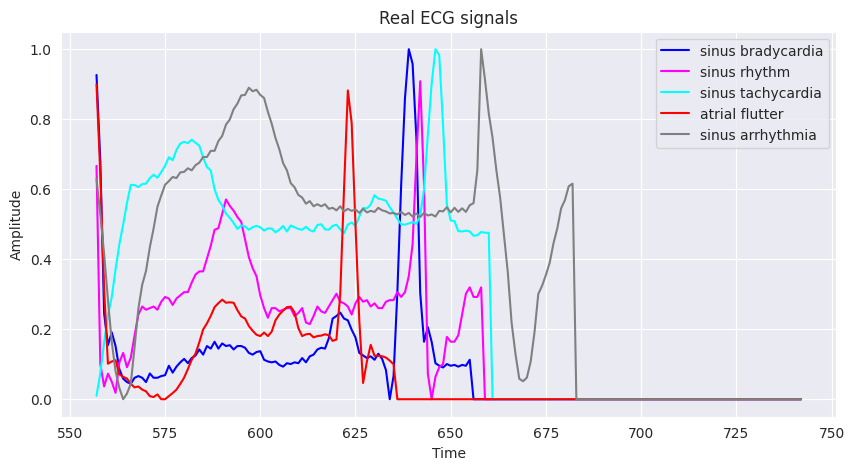

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_0.iloc[0, -187:-1], color='blue', label='sinus bradycardia')
plt.plot(data_1.iloc[0, -187:-1], color='magenta', label='sinus rhythm')
plt.plot(data_2.iloc[0, -187:-1], color='cyan', label='sinus tachycardia')
plt.plot(data_3.iloc[0, -187:-1], color='red', label='atrial flutter')
plt.plot(data_4.iloc[0, -187:-1], color='grey', label='sinus arrhythmia')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Real ECG signals')
plt.legend()
plt.savefig('Real_ECG_signals.pdf')

In [ ]:
import scipy.io
import numpy as np

file_path = 'data.mat'
scipy.io.savemat(file_path, {'data_0': data_0.iloc[:, 0:187].to_numpy(),
                            'data_1': data_1.iloc[:, 0:187].to_numpy(),
                            'data_2': data_2.iloc[:, 0:187].to_numpy(),
                            'data_3': data_3.iloc[:, 0:187].to_numpy(),
                            'data_4': data_4.iloc[:, 0:187].to_numpy()})
# file_path = 'data_1.mat'
# scipy.io.savemat(file_path, {'data_1': data_0.iloc[0, 0:187].to_numpy()})
# file_path = 'data_2.mat'
# scipy.io.savemat(file_path, {'data_2': data_0.iloc[0, 0:187].to_numpy()})
# file_path = 'data_3.mat'
# scipy.io.savemat(file_path, {'data_3': data_0.iloc[0, 0:187].to_numpy()})
# file_path = 'data_4.mat'
# scipy.io.savemat(file_path, {'data_4': data_0.iloc[0, 0:187].to_numpy()})

### data resampling

In [17]:
from sklearn.utils import resample
data_0_resample = resample(data_0.iloc[0, -187:], n_samples=20000,
                           random_state=50, replace=True)
data_1_resample = resample(data_1.iloc[0, -187:], n_samples=20000,
                           random_state=50, replace=True)
data_2_resample = resample(data_2.iloc[0, -187:], n_samples=20000,
                           random_state=50, replace=True)
data_3_resample = resample(data_3.iloc[0, -187:], n_samples=20000,
                           random_state=50, replace=True)
data_4_resample = resample(data_4.iloc[0, -187:], n_samples=20000,
                           random_state=50, replace=True)

In [18]:
train_dataset = pd.concat([data_0_resample, data_1_resample, data_2_resample, data_3_resample,
                          data_4_resample])

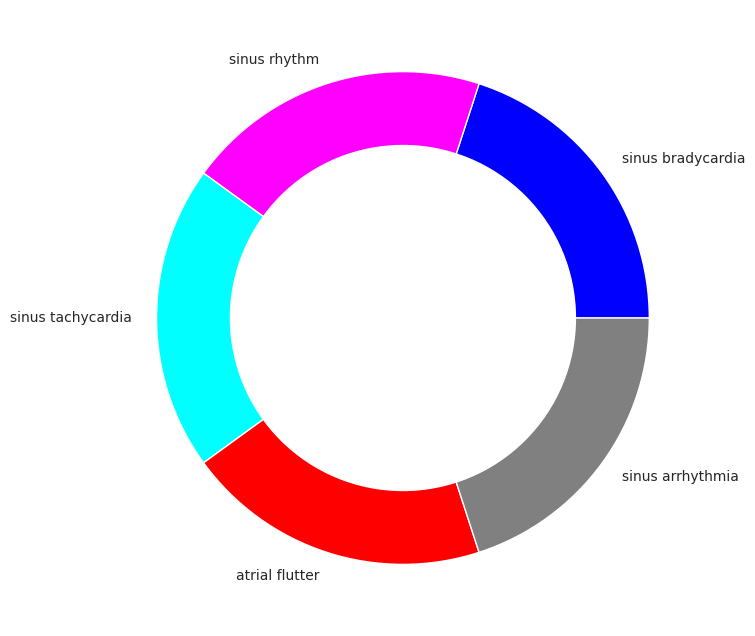

In [19]:
# viewing the distribution of beats in our dataset
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset["Label"].value_counts(), labels=['sinus bradycardia', 'sinus rhythm', 'sinus tachycardia',
                                                'atrial flutter', 'sinus arrhythmia'], colors=['blue', 'magenta', 'cyan',
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

In [20]:
def plot_heartbeat(data, classname):
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    fig.suptitle(f'Heartbeat {classname}', fontsize=15)
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(data.iloc[i*5+j, 0:550])

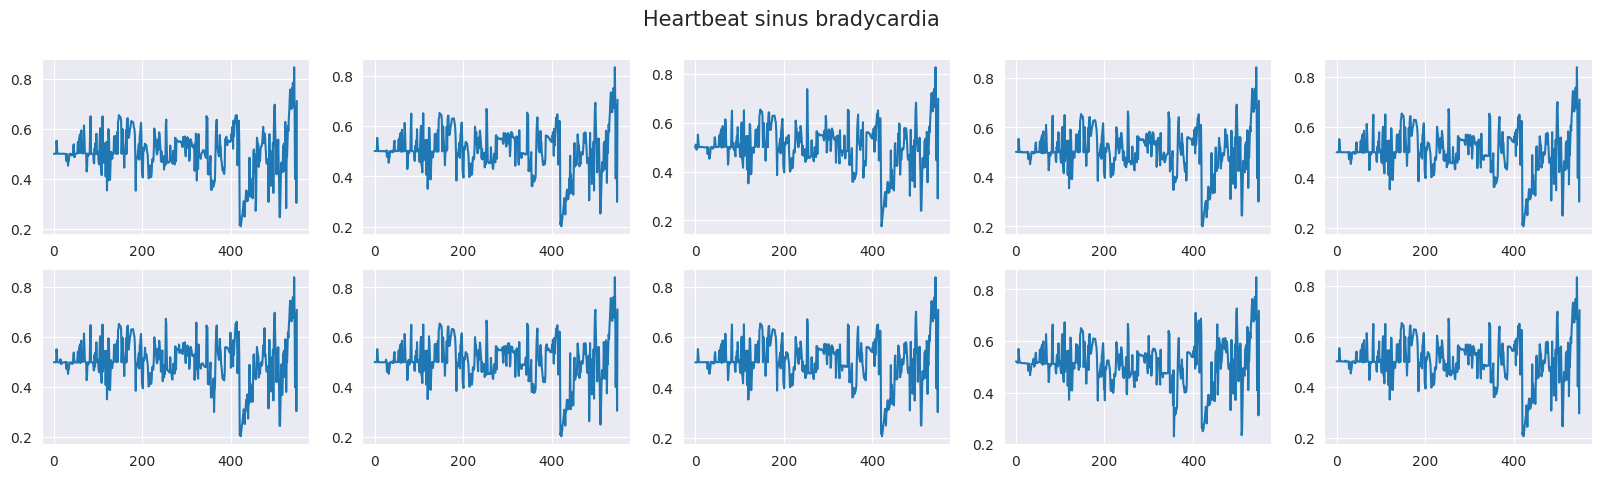

In [21]:
plot_heartbeat(data_0, 'sinus bradycardia')

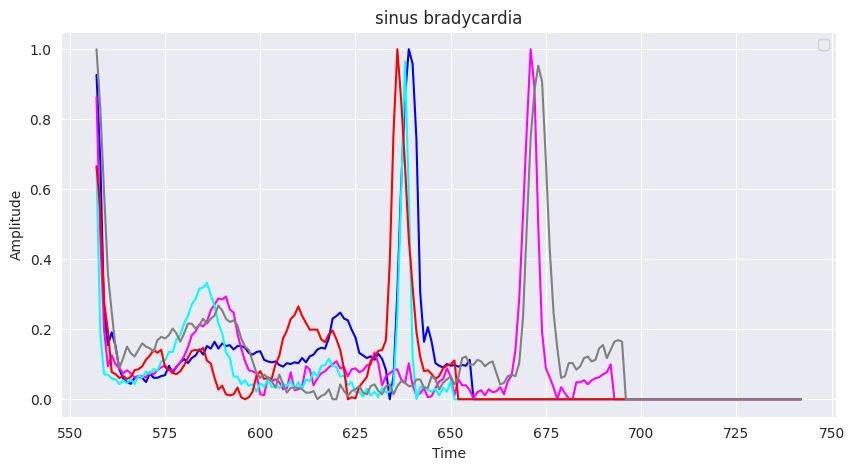

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_0.iloc[0, -187:-1], color='blue')
plt.plot(data_0.iloc[1, -187:-1], color='magenta')
plt.plot(data_0.iloc[2, -187:-1], color='cyan')
plt.plot(data_0.iloc[3, -187:-1], color='red')
plt.plot(data_0.iloc[4, -187:-1], color='grey')
plt.title('sinus bradycardia')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

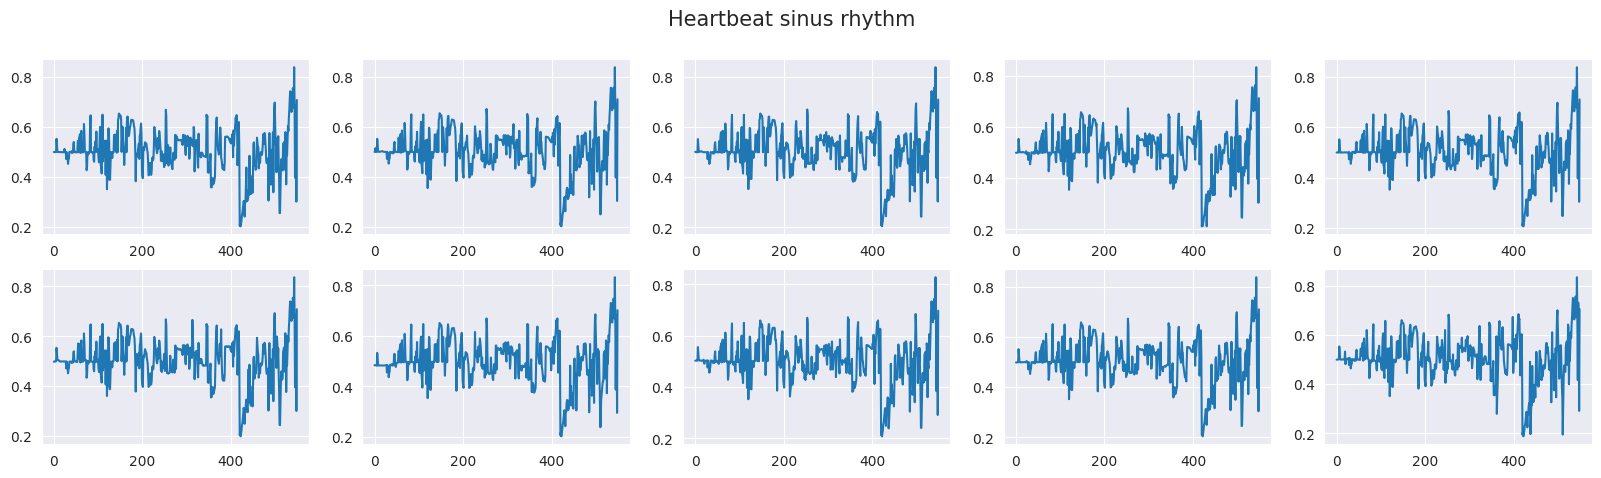

In [24]:
plot_heartbeat(data_1, 'sinus rhythm')

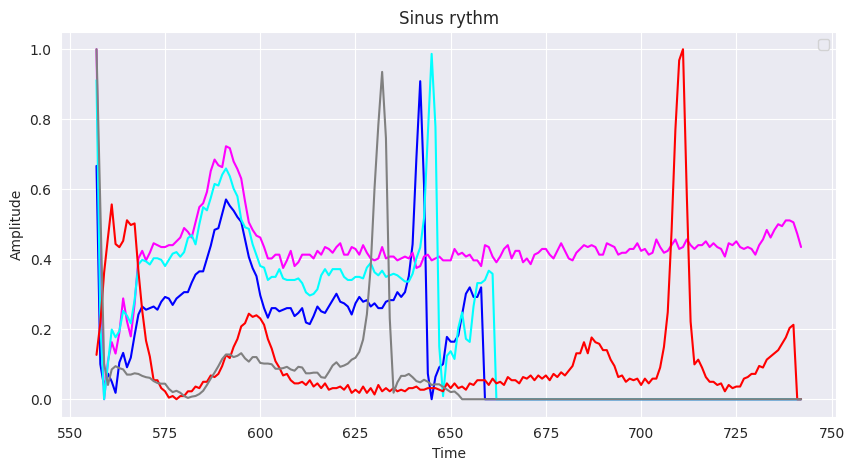

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_1.iloc[0, -187:-1], color='blue')
plt.plot(data_1.iloc[1, -187:-1], color='magenta')
plt.plot(data_1.iloc[2, -187:-1], color='cyan')
plt.plot(data_1.iloc[3, -187:-1], color='red')
plt.plot(data_1.iloc[4, -187:-1], color='grey')
plt.title('Sinus rythm')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [ ]:
plot_heartbeat(data_2, 'sinus tachycardia')

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_2.iloc[0, 0:187], color='blue')
plt.plot(data_2.iloc[1, 0:187], color='magenta')
plt.plot(data_2.iloc[2, 0:187], color='cyan')
plt.plot(data_2.iloc[3, 0:187], color='red')
plt.plot(data_2.iloc[4, 0:187], color='grey')
plt.title('sinus tachycardia')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()


In [ ]:
plot_heartbeat(data_3, 'atrial flutter')

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_3.iloc[0, 0:187], color='blue')
plt.plot(data_3.iloc[1, 0:187], color='magenta')
plt.plot(data_3.iloc[2, 0:187], color='cyan')
plt.plot(data_3.iloc[3, 0:187], color='red')
plt.plot(data_3.iloc[4, 0:187], color='grey')
plt.title('atrial flutter')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()


In [ ]:
plot_heartbeat(data_4, 'sinus arrhythmia')

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_4.iloc[0, 0:187], color='blue')
plt.plot(data_4.iloc[1, 0:187], color='magenta')
plt.plot(data_4.iloc[2, 0:187], color='cyan')
plt.plot(data_4.iloc[3, 0:187], color='red')
plt.plot(data_4.iloc[4, 0:187], color='grey')
plt.title('sinus arrhythmia')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [ ]:
sns.set_style('white')
fig, axs = plt.subplots(1, 4, figsize=(15,5))
fig.suptitle('sinus bradycardia', fontsize=20)
axs[0].plot(data_4.iloc[0, 0:550])
axs[1].plot(data_4.iloc[1, 0:550])
axs[2].plot(data_4.iloc[2, 0:550])
axs[3].plot(data_4.iloc[3, 0:550])
#plt.savefig("./sinus bradycardia.pdf", format="pdf")

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))
fig.suptitle('sinus rhythm', fontsize=20)
axs[0].plot(data_2.iloc[0, 0:550])
axs[1].plot(data_2.iloc[1, 0:550])
axs[2].plot(data_2.iloc[2, 0:550])
axs[3].plot(data_2.iloc[3, 0:550])
#plt.savefig("./Rsinus rhythm.pdf", format="pdf")

In [ ]:
def plot_hist(data,start,size,bins):
    sigs=data.iloc[:, start:size].to_numpy()
#     end = start+size
#     sigs=sigs[:,start:end]
    sigs_flatten=sigs.flatten()

    final1=np.arange(start,size)
    for i in range (sigs.shape[0]-1):
        tempo1=np.arange(start,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(sigs_flatten))
    plt.hist2d(final1,sigs_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

In [ ]:
plot_hist(data_1,5,70,65)

In [ ]:
target_train = train_dataset[555]
target_test = data_test[555]
target_train.unique()

In [ ]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = data_test.iloc[:, :-1].values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(target_train.shape)
print(target_test.shape)

In [26]:
from DataLoader import *
from torch.utils import data

In [27]:
train_data = mitbih_train()

X_train shape is (100000, 1, 1, 187)
y_train shape is (100000,)
The dataset including 20000 class 0, 20000 class 1, 20000 class 2, 20000 class 3, 20000 class 4


In [28]:
train_loader = data.DataLoader(train_data, batch_size=64, num_workers=4, shuffle=True)

In [29]:
test_data = mitbih_test()

X_test shape is (5000, 1, 1, 187)
y_test shape is (5000,)
The dataset including 18118 class 0, 556 class 1, 1448 class 2, 162 class 3, 1608 class 4


In [30]:
test_loader = data.DataLoader(test_data, batch_size=64, num_workers=4, shuffle=True)

In [31]:
import matplotlib.pyplot as plt
from TransCGAN_model import *

In [32]:
patch_size = 1
seq_len = 187

# cgan model trained use wassertein loss
CGAN_model_path = './checkpoint'

In [33]:
gen_net = Generator(seq_len=seq_len, channels=1, num_classes=5, latent_dim=100, data_embed_dim=10,
                    label_embed_dim=10 ,depth=3, num_heads=5,
                    forward_drop_rate=0.5, attn_drop_rate=0.5)

In [34]:
CGAN_ckp = torch.load(CGAN_model_path)
gen_net.load_state_dict(CGAN_ckp['gen_state_dict'])

<All keys matched successfully>

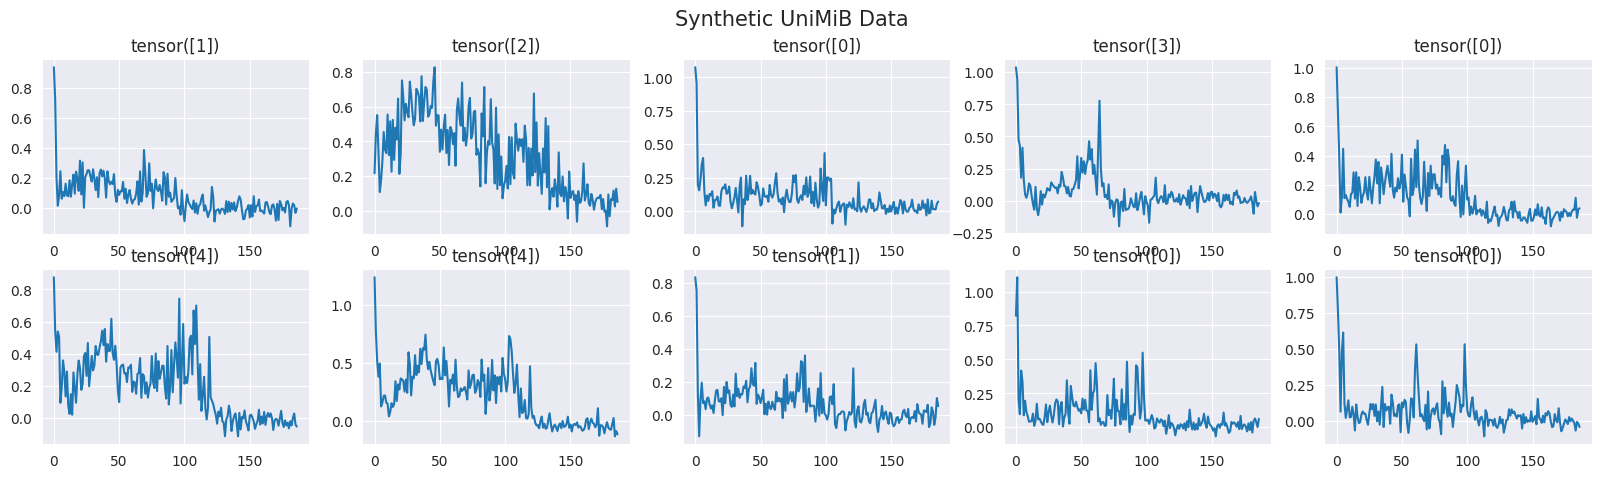

In [35]:
synthetic_data = []
synthetic_labels = []

for i in range(10):
    fake_noise = torch.FloatTensor(np.random.normal(0, 1, (1, 100)))
    fake_label = torch.randint(0, 5, (1,))
    fake_sigs = gen_net(fake_noise, fake_label).to('cpu').detach().numpy()

    synthetic_data.append(fake_sigs)
    synthetic_labels.append(fake_label)

fig, axs = plt.subplots(2, 5, figsize=(20,5))
fig.suptitle(f'Synthetic UniMiB Data', fontsize=15)
for i in range(2):
    for j in range(5):
        axs[i, j].plot(synthetic_data[i*5+j][0][0][0][:])
        axs[i, j].title.set_text(synthetic_labels[i*5+j])

(5, 1, 1, 187)


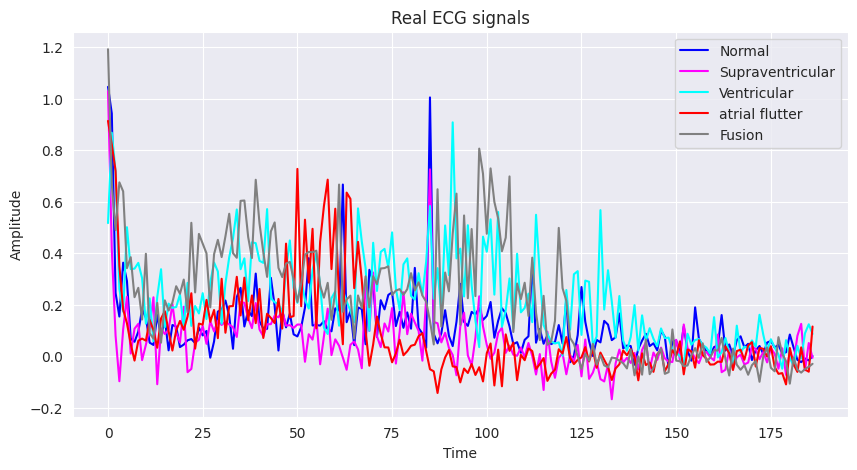

In [37]:
#plot synthetic signals in a plot
fake_noise = torch.FloatTensor(np.random.normal(0, 1, (5, 100)))
fake_label = torch.tensor([0, 1, 2, 3, 4])
fake_sigs = gen_net(fake_noise, fake_label).to('cpu').detach().numpy()
print(fake_sigs.shape)
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(fake_sigs[0][0][0][:187], color='blue', label='Normal')
plt.plot(fake_sigs[1][0][0][:187], color='magenta', label='Supraventricular')
plt.plot(fake_sigs[2][0][0][:187], color='cyan', label='Ventricular')
plt.plot(fake_sigs[3][0][0][:187], color='red', label='atrial flutter')
plt.plot(fake_sigs[4][0][0][:187], color='grey',label='Fusion')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Real ECG signals')
plt.legend()
plt.savefig('Synthetic_ECG_signals.pdf')

In [38]:
class_dict = {'sinus bradycardia':0, 'sinus rhythm':1, 'sinus tachycardia':2, 'atrial flutter':3, 'sinus arrhythmia':4}
def plot_synthetic_heartbeat(classname):
    synthetic_data = []
    synthetic_labels = []
    for i in range(10):
        fake_noise = torch.FloatTensor(np.random.normal(0, 1, (1, 100)))
        fake_label = torch.tensor([class_dict[classname]])
        fake_sigs = gen_net(fake_noise, fake_label).to('cpu').detach().numpy()

        synthetic_data.append(fake_sigs)
        synthetic_labels.append(fake_label)

    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    fig.suptitle(f'Synthetic HeartBeat {classname}', fontsize=15)
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(synthetic_data[i*5+j][0][0][0][:])
            axs[i, j].title.set_text(synthetic_labels[i*5+j])

In [39]:
class_dict = {'sinus bradycardia':0, 'sinus rhythm':1, 'sinus tachycardia':2, 'atrial flutter':3, 'sinus arrhythmia':4}
def plot_synthetic_heartbeat(classname):
    synthetic_data = []
    synthetic_labels = []
    for i in range(4):
        fake_noise = torch.FloatTensor(np.random.normal(0, 1, (1, 100)))
        fake_label = torch.tensor([class_dict[classname]])
        fake_sigs = gen_net(fake_noise, fake_label).to('cpu').detach().numpy()

        synthetic_data.append(fake_sigs)
        synthetic_labels.append(fake_label)

    fig, axs = plt.subplots(1, 4, figsize=(15,5))
    fig.suptitle(f'Synthetic {classname}', fontsize=15)
    for i in range(4):
        axs[i].plot(synthetic_data[i][0][0][0][:])
    plt.savefig(f'./syn_{classname}.pdf', format="pdf")

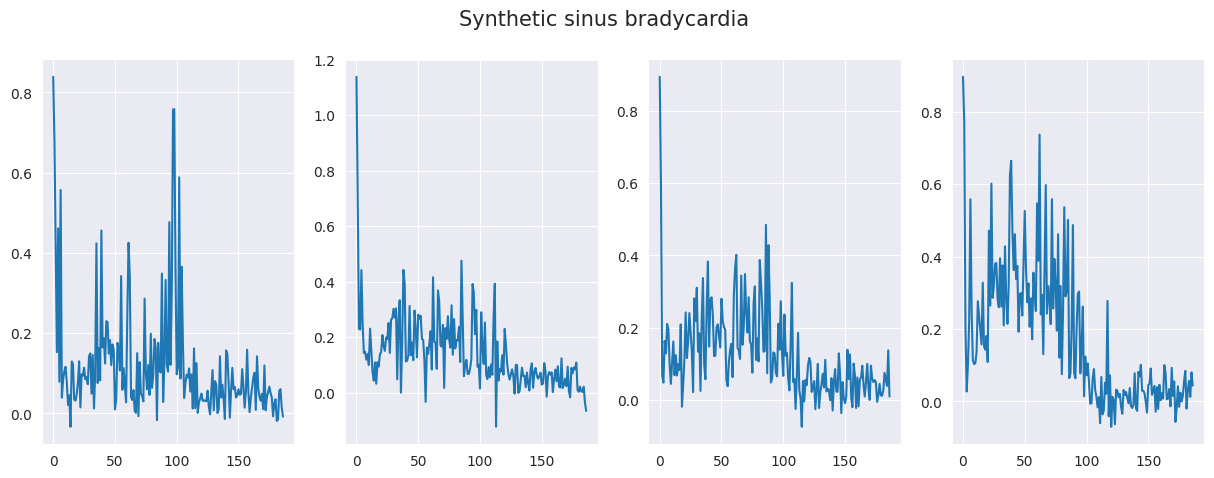

In [40]:
plot_synthetic_heartbeat('sinus bradycardia')

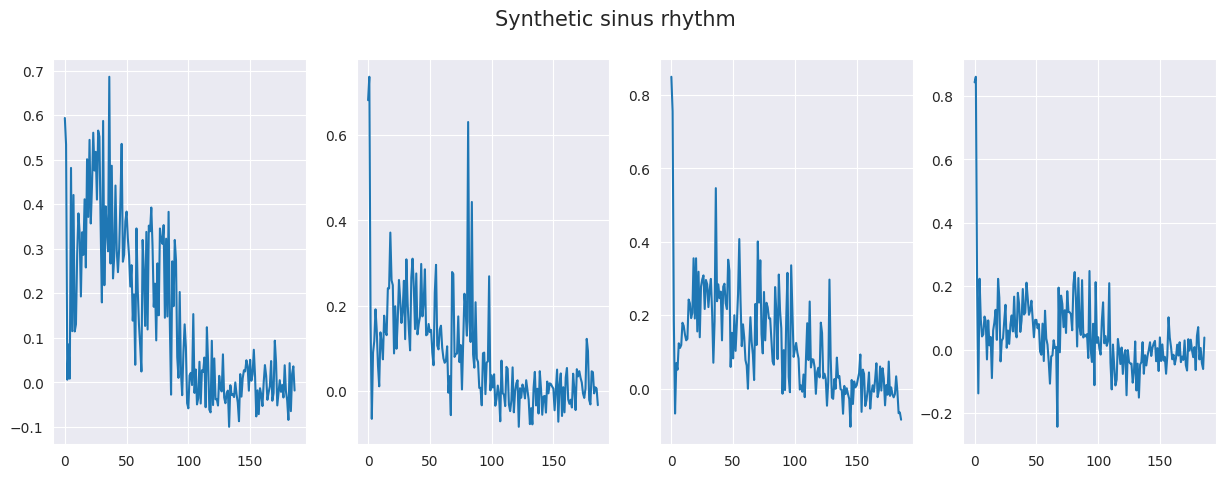

In [41]:
plot_synthetic_heartbeat('sinus rhythm')

In [ ]:
plot_synthetic_heartbeat('sinus tachycardia')

In [ ]:
plot_synthetic_heartbeat('atrial flutter')

In [ ]:
plot_synthetic_heartbeat('sinus arrhythmia')

In [42]:
from synDataLoader import *
from torch.utils import data

In [43]:
syn_ecg = syn_mitbih(n_samples=1000, reshape=True)

data shape is (5000, 1, 187)
labels shape is (5000,)
The dataset including 1000 class 0, 1000 class 1, 1000 class 2, 1000 class 3, 1000 class 4


In [45]:
def plot_hist_syn(data,start,size,bins, filename="test_syn"):
    sigs=data[:, start:size]
#     end = start+size
#     sigs=sigs[:,start:end]
    sigs_flatten=sigs.flatten()

    final1=np.arange(start,size)
    for i in range (sigs.shape[0]-1):
        tempo1=np.arange(start,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(sigs_flatten))

    # Check if the lengths of final1 and sigs_flatten are equal
    if len(final1) != len(sigs_flatten):
        print(f"Error: Length of final1 ({len(final1)}) not equal to length of sigs_flatten ({len(sigs_flatten)})")
        # Adjust the size of final1 to match sigs_flatten (or vice-versa)
        # This is just an example, you need to figure out the correct logic based on your data
        final1 = final1[:len(sigs_flatten)]

    plt.hist2d(final1,sigs_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    #plt.savefig(f'{filename}.pdf')
    plt.show()

In [46]:
def plot_hist(data,start,size,bins, filename="test_real"):
    sigs=data.iloc[:, start:size].to_numpy()
#     end = start+size
#     sigs=sigs[:,start:end]
    sigs_flatten=sigs.flatten()

    final1=np.arange(start,size)
    for i in range (sigs.shape[0]-1):
        tempo1=np.arange(start,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(sigs_flatten))
    plt.hist2d(final1,sigs_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    #plt.savefig(f'{filename}.pdf')
    plt.show()

In [ ]:
data_0

65000
65000


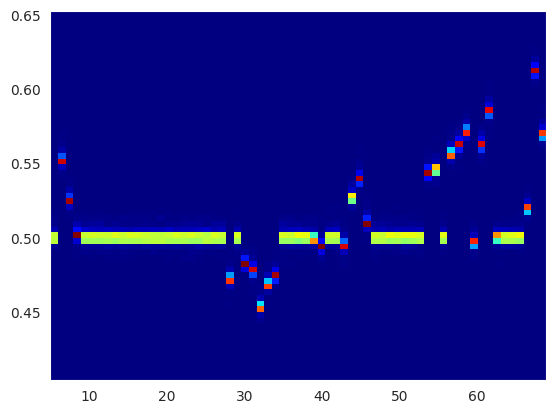

In [47]:
plot_hist(data_0[:1000],5,70,65, "data_0_real")

In [48]:
plot_hist_syn(data_0_syn[:800],5,70,65, "data_0_syn")

NameError: name 'data_0_syn' is not defined

In [ ]:
plot_hist_syn(syn_ecg.syn_1,5,50,45, "data_1_syn")

In [ ]:
plot_hist(data_1[:1000],5,50,45, "data_1_real")

In [ ]:
plot_hist_syn(syn_ecg.syn_2,5,50,45, "data_2_syn")

In [ ]:
plot_hist(data_2[:1000],5,50,45, "data_2_real")

In [ ]:
plot_hist_syn(syn_ecg.syn_3,15,60,45, "data_3_syn")

In [ ]:
plot_hist(data_3[:1000],15,60,45, "data_3_real")

In [ ]:
plot_hist(data_4[:1000],15,60,45, "data_4_real")

In [ ]:
plot_hist_syn(syn_ecg.syn_4,15,60,45, "data_4_syn")